In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

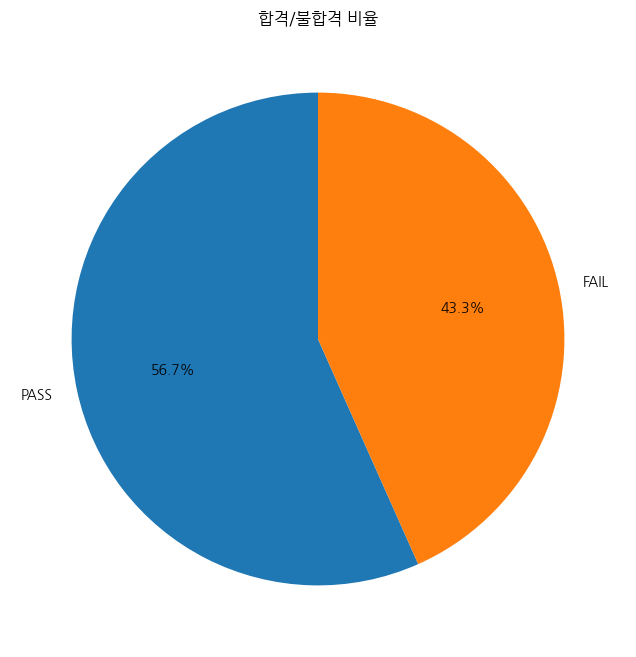

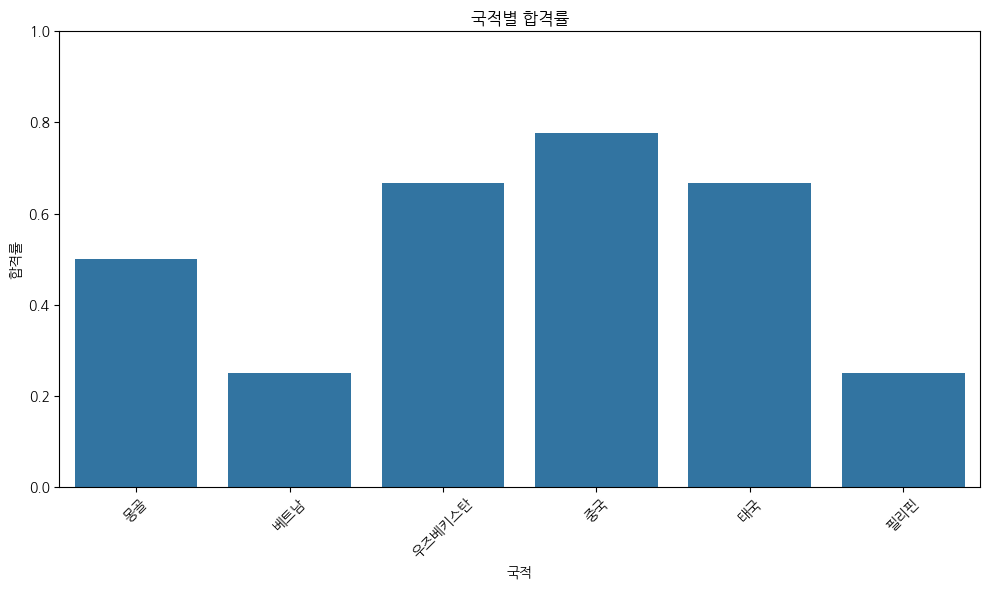

/tmp/ipykernel_373717/994348097.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_pass_rate = df.groupby('연령대')['결과'].apply(lambda x: (x == 'PASS').mean())


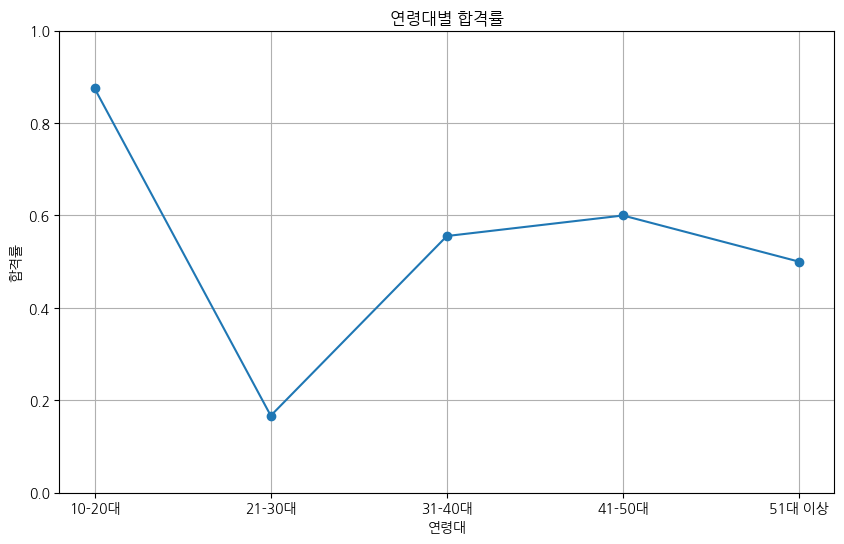

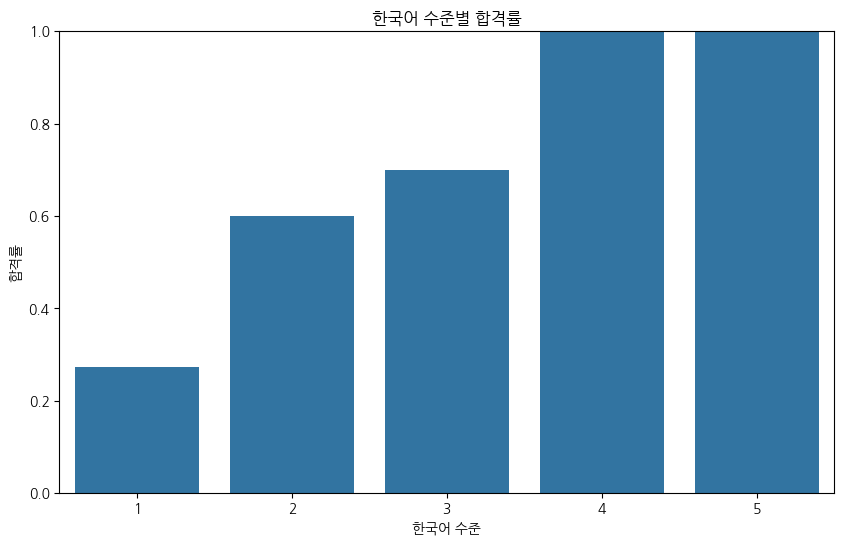

전체 합격률: 56.67%

국적별 합격률:
국적
몽골        0.500000
베트남       0.250000
우즈베키스탄    0.666667
중국        0.777778
태국        0.666667
필리핀       0.250000
Name: 결과, dtype: float64

연령대별 합격률:
연령대
10-20대    0.875000
21-30대    0.166667
31-40대    0.555556
41-50대    0.600000
51대 이상    0.500000
Name: 결과, dtype: float64

한국어 수준별 합격률:
한국어 수준
1    0.272727
2    0.600000
3    0.700000
4    1.000000
5    1.000000
Name: 결과, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('../응답_데이터.csv')

# 1. 합격/불합격 비율 파이 차트
plt.figure(figsize=(8, 8))
df['결과'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('합격/불합격 비율')
plt.ylabel('')  # y 레이블 제거
plt.show()

# 2. 국적별 합격률 막대 그래프
nationality_pass_rate = df.groupby('국적')['결과'].apply(lambda x: (x == 'PASS').mean())

plt.figure(figsize=(10, 6))
sns.barplot(x=nationality_pass_rate.index, y=nationality_pass_rate.values)
plt.title('국적별 합격률')
plt.xlabel('국적')
plt.ylabel('합격률')
plt.ylim(0, 1)  # y축 범위를 0~1로 설정
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. 연령대별 합격률 선 그래프
df['연령대'] = pd.cut(df['나이'], bins=[0, 20, 30, 40, 50, 100], labels=['10-20대', '21-30대', '31-40대', '41-50대', '51대 이상'])
age_pass_rate = df.groupby('연령대')['결과'].apply(lambda x: (x == 'PASS').mean())

plt.figure(figsize=(10, 6))
plt.plot(age_pass_rate.index, age_pass_rate.values, marker='o')
plt.title('연령대별 합격률')
plt.xlabel('연령대')
plt.ylabel('합격률')
plt.ylim(0, 1)  # y축 범위를 0~1로 설정
plt.grid(True)
plt.show()

# 4. 한국어 수준별 합격률 막대 그래프
level_pass_rate = df.groupby('한국어 수준')['결과'].apply(lambda x: (x == 'PASS').mean())

plt.figure(figsize=(10, 6))
sns.barplot(x=level_pass_rate.index, y=level_pass_rate.values)
plt.title('한국어 수준별 합격률')
plt.xlabel('한국어 수준')
plt.ylabel('합격률')
plt.ylim(0, 1)  # y축 범위를 0~1로 설정
plt.show()

# 추가 정보 출력
print("전체 합격률: {:.2f}%".format(df['결과'].value_counts(normalize=True)['PASS'] * 100))
print("\n국적별 합격률:")
print(nationality_pass_rate)
print("\n연령대별 합격률:")
print(age_pass_rate)
print("\n한국어 수준별 합격률:")
print(level_pass_rate)